In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing , svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')


In [170]:
data = pd.read_csv('/home/dell/Desktop/miniproject/employee_data.csv', delimiter=',')


In [171]:
print(data.shape)

(14999, 12)


In [172]:
data.apply(lambda x: sum(x.isnull()))


name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64

In [173]:
data.head()

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [174]:
data.describe()


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [175]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    14998 non-null  object 
 1   satisfaction_level      14999 non-null  float64
 2   last_evaluation         14999 non-null  float64
 3   number_projects         14999 non-null  int64  
 4   average_monthly_hours   14999 non-null  int64  
 5   time_spent_company      14999 non-null  int64  
 6   work_accident           14999 non-null  int64  
 7   left                    14999 non-null  int64  
 8   promotion_last_5_years  14999 non-null  int64  
 9   department              14999 non-null  object 
 10  salary                  14999 non-null  object 
 11  salary_level            14999 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.4+ MB


In [176]:
print(data[data['name']==""].info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    0 non-null      object 
 1   satisfaction_level      0 non-null      float64
 2   last_evaluation         0 non-null      float64
 3   number_projects         0 non-null      int64  
 4   average_monthly_hours   0 non-null      int64  
 5   time_spent_company      0 non-null      int64  
 6   work_accident           0 non-null      int64  
 7   left                    0 non-null      int64  
 8   promotion_last_5_years  0 non-null      int64  
 9   department              0 non-null      object 
 10  salary                  0 non-null      object 
 11  salary_level            0 non-null      int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 0.0+ bytes
None


In [177]:
categorical = data.dtypes[data.dtypes=="object"].index

print(categorical)


Index(['name', 'department', 'salary'], dtype='object')


In [139]:
data[categorical].apply(lambda x: len(x.unique()))

name          14999
department       10
salary            3
dtype: int64

In [140]:
data[categorical].describe()

,name,department,salary
count,14998,14999,14999
unique,14998,10,3
top,LEBARON,sales,low
freq,1,4140,7316


In [141]:
#Excluding Name:

categorical_columns = [x for x in categorical if x not in ['name']]

#Printing Frequency of categories:

for col in categorical_columns:
    print('\nFrequency of Categories for variable :',col)
    print(data[col].value_counts())


Frequency of Categories for variable : department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Frequency of Categories for variable : salary
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [142]:
data.apply(lambda x: sum(x.isnull()))

name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64

In [143]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['salary','department'])


In [144]:
data.dtypes

name                       object
satisfaction_level        float64
last_evaluation           float64
number_projects             int64
average_monthly_hours       int64
time_spent_company          int64
work_accident               int64
left                        int64
promotion_last_5_years      int64
salary_level                int64
salary_high                 uint8
salary_low                  uint8
salary_medium               uint8
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [145]:
data.head()


,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,SMITH,0.38,0.53,2,157,3,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
3,BROWN,0.72,0.87,5,223,5,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,JONES,0.37,0.52,2,159,3,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [146]:
data[['department_IT','department_RandD','department_accounting','department_hr','department_management','department_marketing','department_product_mng','department_sales','department_support','department_technical']].head(10)

,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0


In [147]:
data[['salary_low','salary_medium','salary_high']].head(10)

,salary_low,salary_medium,salary_high
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [148]:
#Drop the columns which have been converted to different types:
data.head()
#data.drop(['salary_level','name','department'],axis=1,inplace=True)

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,SMITH,0.38,0.53,2,157,3,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
3,BROWN,0.72,0.87,5,223,5,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,JONES,0.37,0.52,2,159,3,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [149]:
data.drop('name',axis=1,inplace=True)

In [150]:
data.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_high,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [151]:
good_employee_data = data.loc[data['last_evaluation'] >= 0.74].loc[data['time_spent_company'] >= 4].loc[data['number_projects'] > 4]
good_employee_data.shape

(1944, 22)

In [152]:
#good_employee_data.to_csv('C://Users//SANDEEP YADAV//Desktop//Major2Poject//good_employee_data.csv')
#print('Done.....!!!')

In [153]:
df = pd.DataFrame(data)
df.head()


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_high,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [154]:
pip install pickle-mixin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [155]:
import pickle

In [156]:
df = df.reindex(np.random.permutation(df.index))
df.head()
pickle_out = open('pickle_data_2.pickle','wb')
pickle.dump(df, pickle_out)
pickle_out.close()

In [157]:
import pickle
pickle_in = open('pickle_data_2.pickle','rb')
data_1= pickle.load(pickle_in)
data_1.head()


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_high,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
642,0.73,0.97,5,235,5,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3175,0.75,0.96,3,252,3,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
3686,0.61,0.99,2,275,3,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
10647,0.58,0.69,4,165,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7421,0.97,0.50,4,216,2,0,0,0,3,1,...,0,0,0,0,0,0,0,1,0,0


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [159]:
X = data_1.loc[:, data_1.columns != 'left']
Y = data_1.loc[:, data_1.columns == 'left']
#X = np.array(df.drop(['left'],1))
#X = preprocessing.scale(X)
#Y = np.array(df['left'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [160]:
print(Y_test[Y_test['left'] == 1].count())

left    718
dtype: int64


In [161]:
from sklearn.model_selection import *

In [162]:
#target = X_train["left"].values
from sklearn.model_selection import train_test_split
features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold=KFold(num_folds,shuffle=True,random_state=seed)
                               
logistic_model = LogisticRegression()
logistic_model.fit(features_one, Y_train)

# Print the Models Coefficients
print(logistic_model.coef_)

# Print normal score
print(logistic_model.score(features_one, Y_train))

results1 = cross_val_score(logistic_model, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_val_score(logistic_model, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set:
lg_prediction = logistic_model.predict(test_features)

acc = accuracy_score(Y_test, lg_prediction)
precision = precision_score(Y_test,lg_prediction)
recall = recall_score(Y_test, lg_prediction)
f1score = f1_score(Y_test, lg_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)

print("Total number of employees which are likely to leave: ", sum(lg_prediction))

[[-3.98655678  0.29535246 -0.30867483  0.00557816  0.26872421 -1.64141861
  -0.57350595 -0.46510456 -0.57787674  0.38746585  0.49359394  0.02320788
  -0.46525608  0.09884686  0.4057478  -0.309805    0.06617397  0.08955618
   0.03069015  0.18395388  0.18006742]]
0.7922326860571715
0.7920663052543786 0.012809226670489704
0.8198427094151943 0.010826012962854592
Accuracy of the algorithm:  0.7816666666666666
Precison of the algorithm:  0.576271186440678
Recall of the algorithm:  0.33147632311977715
F1_Score of the algorithm:  0.4208664898320071
Total number of employees which are likely to leave:  413


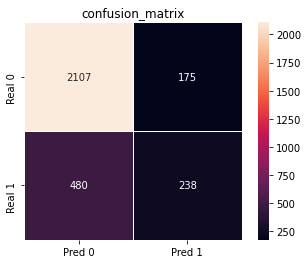

<Figure size 432x360 with 0 Axes>

In [163]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, lg_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()



In [164]:
# Using Decision Trees
from sklearn.model_selection import train_test_split
features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold=KFold(num_folds,shuffle=True,random_state=seed)
                               
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features_one, Y_train)


# Print normal score
print(decision_tree.score(features_one, Y_train))

results1 = cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set:
dt_prediction = decision_tree.predict(test_features)

acc = accuracy_score(Y_test, dt_prediction)
precision = precision_score(Y_test, dt_prediction)
recall = recall_score(Y_test, dt_prediction)
f1score = f1_score(Y_test, dt_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(dt_prediction))

print(decision_tree.feature_importances_)

1.0
0.9789986099527385 0.0047538491167606785
0.9731721055383886 0.005196661752237241
Accuracy of the algorithm:  0.9796666666666667
Precison of the algorithm:  0.9445196211096076
Recall of the algorithm:  0.9721448467966574
F1_Score of the algorithm:  0.9581331503088538
Total number of employees which are likely to leave:  739
[4.96846036e-01 1.47912833e-01 1.03854308e-01 8.44172961e-02
 1.40935330e-01 1.46519558e-03 2.63998391e-05 2.39516706e-03
 7.46911092e-04 2.97759987e-03 1.87598225e-03 1.02862163e-03
 9.91503388e-04 9.52314421e-04 8.82199514e-04 2.53039298e-03
 6.87125687e-05 3.44884239e-04 2.26466526e-03 3.32287149e-03
 4.16077579e-03]


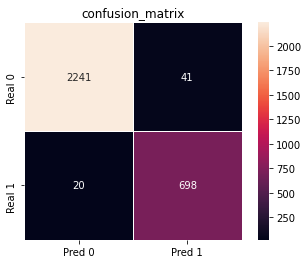

<Figure size 432x360 with 0 Axes>

In [165]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, dt_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()


In [166]:
# Using Random Forest

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold=KFold(num_folds,shuffle=True,random_state=seed)
                               
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
forest.fit(features_one, Y_train)


# Print normal score
print(forest.score(features_one, Y_train))

results1 = cross_val_score(forest, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_val_score(forest, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set:
forest_prediction = forest.predict(test_features)

acc = accuracy_score(Y_test, forest_prediction)
precision = precision_score(Y_test, forest_prediction)
recall = recall_score(Y_test, forest_prediction)
f1score = f1_score(Y_test, forest_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(dt_prediction))

print(forest.feature_importances_)

0.9820818401533461
0.9784985404503754 0.003306476556700925
0.9901329669389041 0.002975025590163477
Accuracy of the algorithm:  0.98
Precison of the algorithm:  0.9895833333333334
Recall of the algorithm:  0.9261838440111421
F1_Score of the algorithm:  0.9568345323741008
Total number of employees which are likely to leave:  739
[0.32495907 0.11630854 0.19509182 0.14615914 0.17598502 0.01139919
 0.00146229 0.00654546 0.00484954 0.0016379  0.00545999 0.00089319
 0.00112375 0.00075559 0.00080703 0.00096221 0.00054922 0.00063217
 0.00168431 0.00105983 0.00167476]


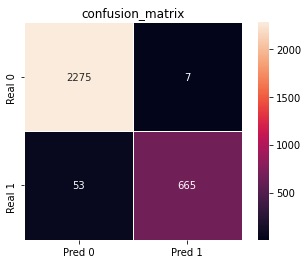

<Figure size 432x360 with 0 Axes>

In [167]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, forest_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

In [168]:
#Using Adaboost Classifier

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
Kfold=KFold(num_folds,shuffle=True,random_state=seed)
                               
ada = AdaBoostClassifier(n_estimators = 100,learning_rate=1.5)
ada.fit(features_one, Y_train)


# Print normal score
print(ada.score(features_one, Y_train))

results1 = cross_val_score(ada, features_one, Y_train , cv=kfold , scoring=scoring1)
print(results1)
#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_val_score(ada, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set:
ada_prediction = ada.predict(test_features)

acc = accuracy_score(Y_test, ada_prediction)
precision = precision_score(Y_test, ada_prediction)
recall = recall_score(Y_test, ada_prediction)
f1score = f1_score(Y_test, ada_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(ada_prediction))

print(ada.feature_importances_)

0.9623301941828486
[0.96083333 0.95       0.96       0.96       0.955      0.9625
 0.96333333 0.95333333 0.9625     0.96914095]
0.9596640950792328 0.0052552703092209035
0.9825638001850663 0.002975150615522372
Accuracy of the algorithm:  0.9566666666666667
Precison of the algorithm:  0.9083333333333333
Recall of the algorithm:  0.9108635097493036
F1_Score of the algorithm:  0.9095966620305981
Total number of employees which are likely to leave:  720
[0.21 0.16 0.06 0.32 0.09 0.03 0.   0.03 0.   0.02 0.   0.   0.02 0.
 0.01 0.   0.   0.02 0.01 0.01 0.01]


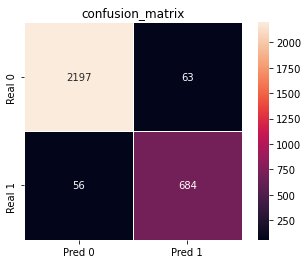

<Figure size 432x360 with 0 Axes>

In [117]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, ada_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()
